In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
# fetch MNIST data from mldata.org
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')





mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
# use help() to find a way to look at the content of mnist
help(mnist)
print(mnist.items())
print(mnist.keys())
print(mnist['DESCR']) #description of data
print(mnist['COL_NAMES'])

Help on Bunch in module sklearn.utils object:

class Bunch(builtins.dict)
 |  Container object for datasets
 |  
 |  Dictionary-like object that exposes its keys as attributes.
 |  
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      __dir__() -> list
 |      default dir() implementation
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Implement setattr(self, name, value).
 |  
 |  __setstate__(self, state)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__


In [4]:
# load data and target as X and y
X, y = mnist['data'], mnist['target']
print(X.shape) #input size (rows, colms)
print(y.shape) 
X[:5] #numpy array not dataframe

(70000, 784)
(70000,)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

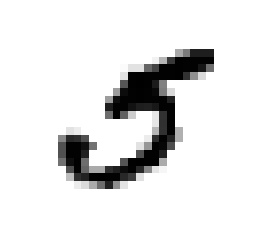

This imahe is: 5.0


In [5]:
# visualize an image from the dataset
ind = 36000 # can pick different numbers until 70000 to display different numbers
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image,             #display value matrix as an image
           cmap = matplotlib.cm.binary,
           interpolation='nearest')
plt.axis('off')
#plt.savefig(os.getcwd() + '/Data/some_digit_plot')
plt.show()
print("This imahe is:", y[ind])

In [6]:
# create a function that plots an image
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image,
               cmap=matplotlib.cm.binary,
               interpolation='nearest')
    plt.axis('off')

In [7]:
# create a function that plots multiple images
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

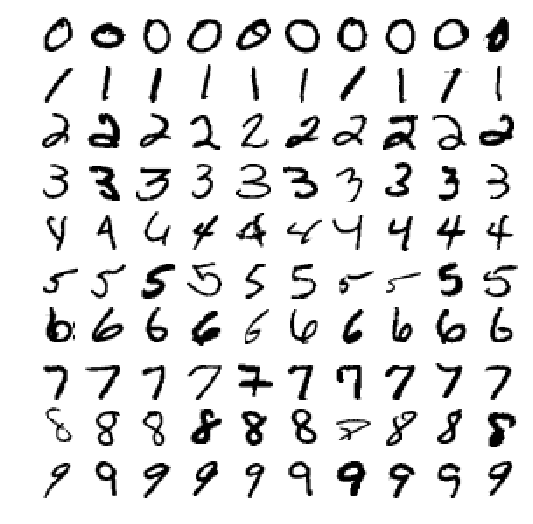

In [8]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

## Binary classifier

In [9]:
# Split the dataset into training set and test set (ratio 6:1)
shuffle_index = np.random.permutation(70000)
X, y = X[shuffle_index], y[shuffle_index]
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

In [12]:
# Create binary classification results
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
print(y_train_5.shape)
print(X_train.shape)

(60000,)
(60000, 784)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train_5)
knn.predict([some_digit])


(60000, 784)

## K-Nearest Neighbor (KNN) Method (Chapter 3 in Text)

- Used to classify new data points based on "distance" to known data
- Find the K nearest neighbors, based on your distance metric
- Let them all vote on the classification

**Disadvantages of this model: ** 
1. For a large dataset,it is very costly to compute all distances between new data and existing data.  
2. If k is small, the model is vulnerable to outliers.
3. If there are multiple points close to the input with similar distance, then the output of the model may be significantly changed by a small variation of the distance. This is especially problematic if the dimensionality of input (number of features) is high (curse of dimentionality). 

### Curse of Dimensionality
Think about this example:  

Let vector v1 = (x1, x2,...,xn) and vector v2 = (y1,y2,...,yn). Each coordinate randomly chosen from [0,1].  

When n is large, I claim that with high probability, both points will be close to the boundary. This is because:  
P(a point is not close to the boundary) = P(all coordinates not close to either 0 or 1)  
= P(x1 not close to 0 or 1) * P(x2 not close to 0 or 1) *...* P(xn not close to 0 or 1)  

>Let's say a coordinate is not close to 0 or 1 if and only if the coordinate is between 0.1 and 0.9.  
Then P(a coordinate not close to 0 or 1) = 0.8  

>Therefore, the P(all coordinates not close to either 0 or 1) = 0.8 * 0.8 *...* 0.8 = 0.8^n is close to 0 when n is large.

### Performance measure of a classifier

- cross-validation

#### Cross Validation
- partition the dataset into k mutully-exclusive subsets
- perform training on all but the 1st set, test the performance on the 1st set.
- perform training on all but the 2nd set, test the performance on the 2nd set.
- perform training on all but the 3rd set, test the performance on the 3rd set.
- ....
- perform training on all but the last set, test the performance on the last set.

In this way, the model is tested on k different training sets. If all performances are acceptable, we should have high confidence on the model.

In [13]:
# make the training set smaller
X_train = X_train[:6000]
y_train = y_train[:6000]
y_train_5 = y_train_5[:6000]

In [17]:
# Cross-validation using cross_val_score
from sklearn.model_selection import cross_val_score  # inputs and what kind of model we are using (knn)
cross_val_score(knn, X_train, y_train_5, 
                cv=3,
                scoring="accuracy") # cv implies we are cutting dataset into 3 pieces (2 for training set and 1 for test set)

array([ 0.98550725,  0.986     ,  0.98949475])

In [18]:
# Cross-validation implemented using StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,
                          shuffle=True,
                          random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_knn = clone(knn)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_knn.fit(X_train_folds, y_train_folds)
    y_pred = clone_knn.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))    

0.988005997001
0.9855
0.989994997499


In [19]:
# The accuracy may be decieving: compare to the following 
# dumb classifier that simply classifies every single image 
# in the 'not-5' class
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass # placeholder, nothing happens when executed
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [20]:
dumb = Never5Classifier()
cross_val_score(dumb, X_train, y_train_5,
                cv=3,
                scoring="accuracy")

array([ 0.9045,  0.9125,  0.908 ])

### Confusion Matrix
For each pair of class A and B:
- count the number of instances of class A being classified as B
- count the number of instances of class B being classified as A

The numbers will form an $n\times n$ matrix, where $n$ is the number of classes.

In [21]:
# obtain predictions obtained by cross-validation
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(knn, X_train, y_train_5, cv=3)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_5, y_train_pred))

[[5426   24]
 [  54  496]]


**For binary classifiers**:
confusion matrx = [[TN, FP], [FN, TP]]

- TN: true negative
- FP: false positive
- FN: false negative
- TP: true positive

**Precision** = TP / (TP + FP)

- What does precision represent?  
Among instances being positively labeled, the percentage of correct labeling. 
- Can a bad model have high precision?



**Recall** = TP / (TP + FN)
- What does recall represent?  
Among instances with a true positive label, the percentage of correct labeling. 
- Can a bad model have high recall?

$F_1$ **score**

$F_1 = \frac{1}{\frac{1}{precision} + \frac{1}{recall}}$

In [22]:
# compute precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision:', precision_score(y_train_5, y_train_pred))
print('recall:', recall_score(y_train_5, y_train_pred))
print('F1 score:', f1_score(y_train_5, y_train_pred))

precision: 0.953846153846
recall: 0.901818181818
F1 score: 0.927102803738


**Precisioni/Recall tradeoff**

If we use an linear model, the direct output of the model will be numerical value. We will get to decide a decision rule on how the numerical value determines which class the input belongs to. In this case the precision and recall can vary depending on the decision rule we impose. By varying the decision rules, we can observe a tradeoff between precision and recall.

In [26]:
# Use SGDClassifier as classifier
from sklearn.linear_model import SGDClassifier #Stocchastic GRadient Descent
sgd = SGDClassifier(loss='log')
sgd.fit(X_train, y_train_5.reshape(-1,1))
sgd.predict(some_digit.reshape(1,-1))


C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ True], dtype=bool)

[False  True False ...,  True False False]


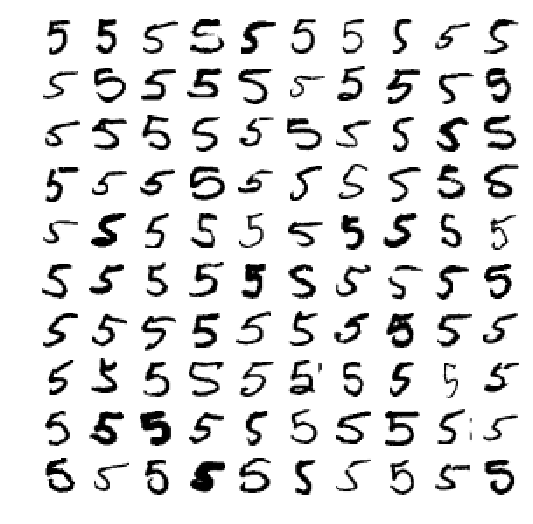

In [55]:
# find the TP, TN, FP, FN
y_pred = sgd.predict(X_train)
print(y_pred)

#find TP
TP = [X_train[k] for k in range(len(y_pred))\
      if y_pred[k] == True and y_train_5[k] == True]

#find FP
FP = [X_train[k] for k in range(len(y_pred))\
      if y_pred[k] == True and y_train_5[k] == False]

#find FN
FN = [X_train[k] for k in range(len(y_pred))\
      if y_pred[k] == False and y_train_5[k] == True]

#find TN
FP = [X_train[k] for k in range(len(y_pred))\
      if y_pred[k] == False and y_train_5[k] == False]

plt.figure(figsize=(9,9))
plot_digits(TP[:100])

In [34]:
# predict the class of some_digit
sgd.predict([some_digit])

array([ True], dtype=bool)

In [38]:
# perform cross-validation
cross_val_score(sgd, X_train, y_train_5, cv = 4)

C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Amanda\Anaconda3\lib\

array([ 0.95469687,  0.95136576,  0.93395597,  0.92795197])

In [46]:
# compute precision and recall
from sklearn.metrics import precision_score ,recall_score
print(confusion_matrix(y_train_5,y_pred))
print('Precision:', precision_score(y_train_5,y_pred))
print('Recall:', recall_score(y_train_5,y_pred))

[[5327  123]
 [  88  462]]
Precision: 0.789743589744
Recall: 0.84


In [47]:
# extract predictions to all data
y_scores = cross_val_predict(sgd, X_train, y_train_5, cv=3,
                             method="decision_function")
y_scores.shape

C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Amanda\Anaconda3\lib\

(6000,)

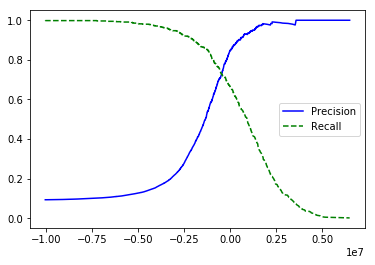

In [52]:
# precision-recall curve
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
plt.plot(thresholds, precisions[:-1], 'b-', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g--', label='Recall')
plt.legend()
plt.show()

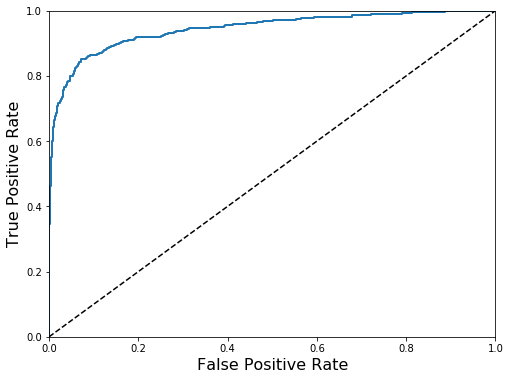

In [49]:
# ROC curve: FP vs. TP
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()